In this notebook pandas is used to load the information we previously gathered and visualize them using mathplotlib and seaborn.

The goal is to identifiy the movies that are most commonly watched during the christmas period.

In [16]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("imdb_trends_new.csv", index_col = 0)
data.index = pd.to_datetime(data.index)

In [18]:
# Overview over the gathered data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2015-01-04 to 2019-12-22
Columns: 2025 entries, The Shawshank Redemption to Little Shop of Horrors
dtypes: int64(2025)
memory usage: 4.0 MB


In [19]:
# Combine the first 11 months to 1 (average) value, and get the difference between this and december.
# A higher result indicates that the movie is mostly searched in december, but not in the rest of the year.
def december(data):
    v1 = data.loc[data.index.month < 12].mean()
    v2 = data.loc[data.index.month == 12].mean()
    r = v2 - v1
    return r

# Only looks at the last two weeks in the year instead of all of december.
def christmasdays(data):
    v1 = data.loc[data.index.weekofyear < 51].mean()
    v2 = data.loc[data.index.weekofyear > 50].mean()
    r = v2 - v1
    return r

In [20]:
# the number of "top" movies we want to look at
selection_number = 10

#look at the top december movies as a subset
r = december(data)
r.sort_values(ascending = False).head(selection_number)

A Charlie Brown Christmas     51.155462
Arthur Christmas              49.422078
Snow Angels                   47.149733
Love Actually                 45.625286
Scrooged                      42.692131
The Muppet Christmas Carol    41.540871
A Christmas Story             36.978610
Home Alone                    36.121085
Trading Places                31.960275
Three Kings                   31.705500
dtype: float64

In [21]:
#look at the top last two week movies as a subset
t = christmasdays(data)
t.sort_values(ascending = False).head(selection_number)

Three Kings                             47.580
Love Actually                           43.700
Scrooged                                41.976
Raiders of the Lost Ark                 41.676
A Christmas Story                       41.264
Indiana Jones and the Temple of Doom    39.032
Trading Places                          38.056
Home Alone                              37.876
Joyeux Noel                             35.960
Indiana Jones and the Last Crusade      35.500
dtype: float64

In [22]:
#Create Dataset with only the top X movies (selection_number)

sub = r.sort_values(ascending = False).head(selection_number)
sub_list = list(sub.index.values)
top_set = data.copy()
for c in data.columns:
    temp = c
    if temp not in sub_list:
        top_set = top_set.drop(columns = [temp])

In [23]:
top_set

,A Charlie Brown Christmas,A Christmas Story,The Muppet Christmas Carol,Love Actually,Trading Places,Home Alone,Three Kings,Arthur Christmas,Scrooged,Snow Angels
date,,,,,,,,,,
2015-01-04,4,4,4,13,28,14,82,9,3,41
2015-01-11,2,2,3,8,25,11,17,4,2,26
2015-01-18,2,2,2,7,39,10,13,4,2,26
2015-01-25,1,2,1,7,43,10,11,4,1,40
2015-02-01,2,1,4,6,23,8,13,4,1,34
...,...,...,...,...,...,...,...,...,...,...
2019-11-24,22,13,17,15,31,29,17,21,11,48
2019-12-01,49,24,23,24,34,35,26,37,24,54
2019-12-08,42,32,30,47,35,42,33,52,25,68


In [24]:
#add row with corresponding value
#temporarily add index(date) as a column
top_set['Time'] = top_set.index

new_row = r.sort_values(ascending = False).head(selection_number)
top = top_set.append(new_row, ignore_index=True)

#sort columns according to new row
top = top.sort_values(260,axis =1)

#drop row to avoid issues with visualisation
top = top.drop(260,axis =0)

#add old datebased index again
top.index = top['Time']
top = top.drop("Time", axis=1)

In [25]:
new_row.sort_values(ascending = False)

A Charlie Brown Christmas     51.155462
Arthur Christmas              49.422078
Snow Angels                   47.149733
Love Actually                 45.625286
Scrooged                      42.692131
The Muppet Christmas Carol    41.540871
A Christmas Story             36.978610
Home Alone                    36.121085
Trading Places                31.960275
Three Kings                   31.705500
dtype: float64

For the 2000 highest rated movies from IMDB I looked up the google search trends for these movies. The plots where rated by comparing the intressed in a movie in december to the rest of the year (mean of december vs mean everything else). The top 10 represent the movies that are searched for in December but not anytime else. The plots only show the popularity of a movie withhin a certain time relative to itself. (Meaning "Arthur Christmas" is not necessarily searched for more often then "Home Alone"). Sources are IMDB and Google Trends.

numpy.ndarray

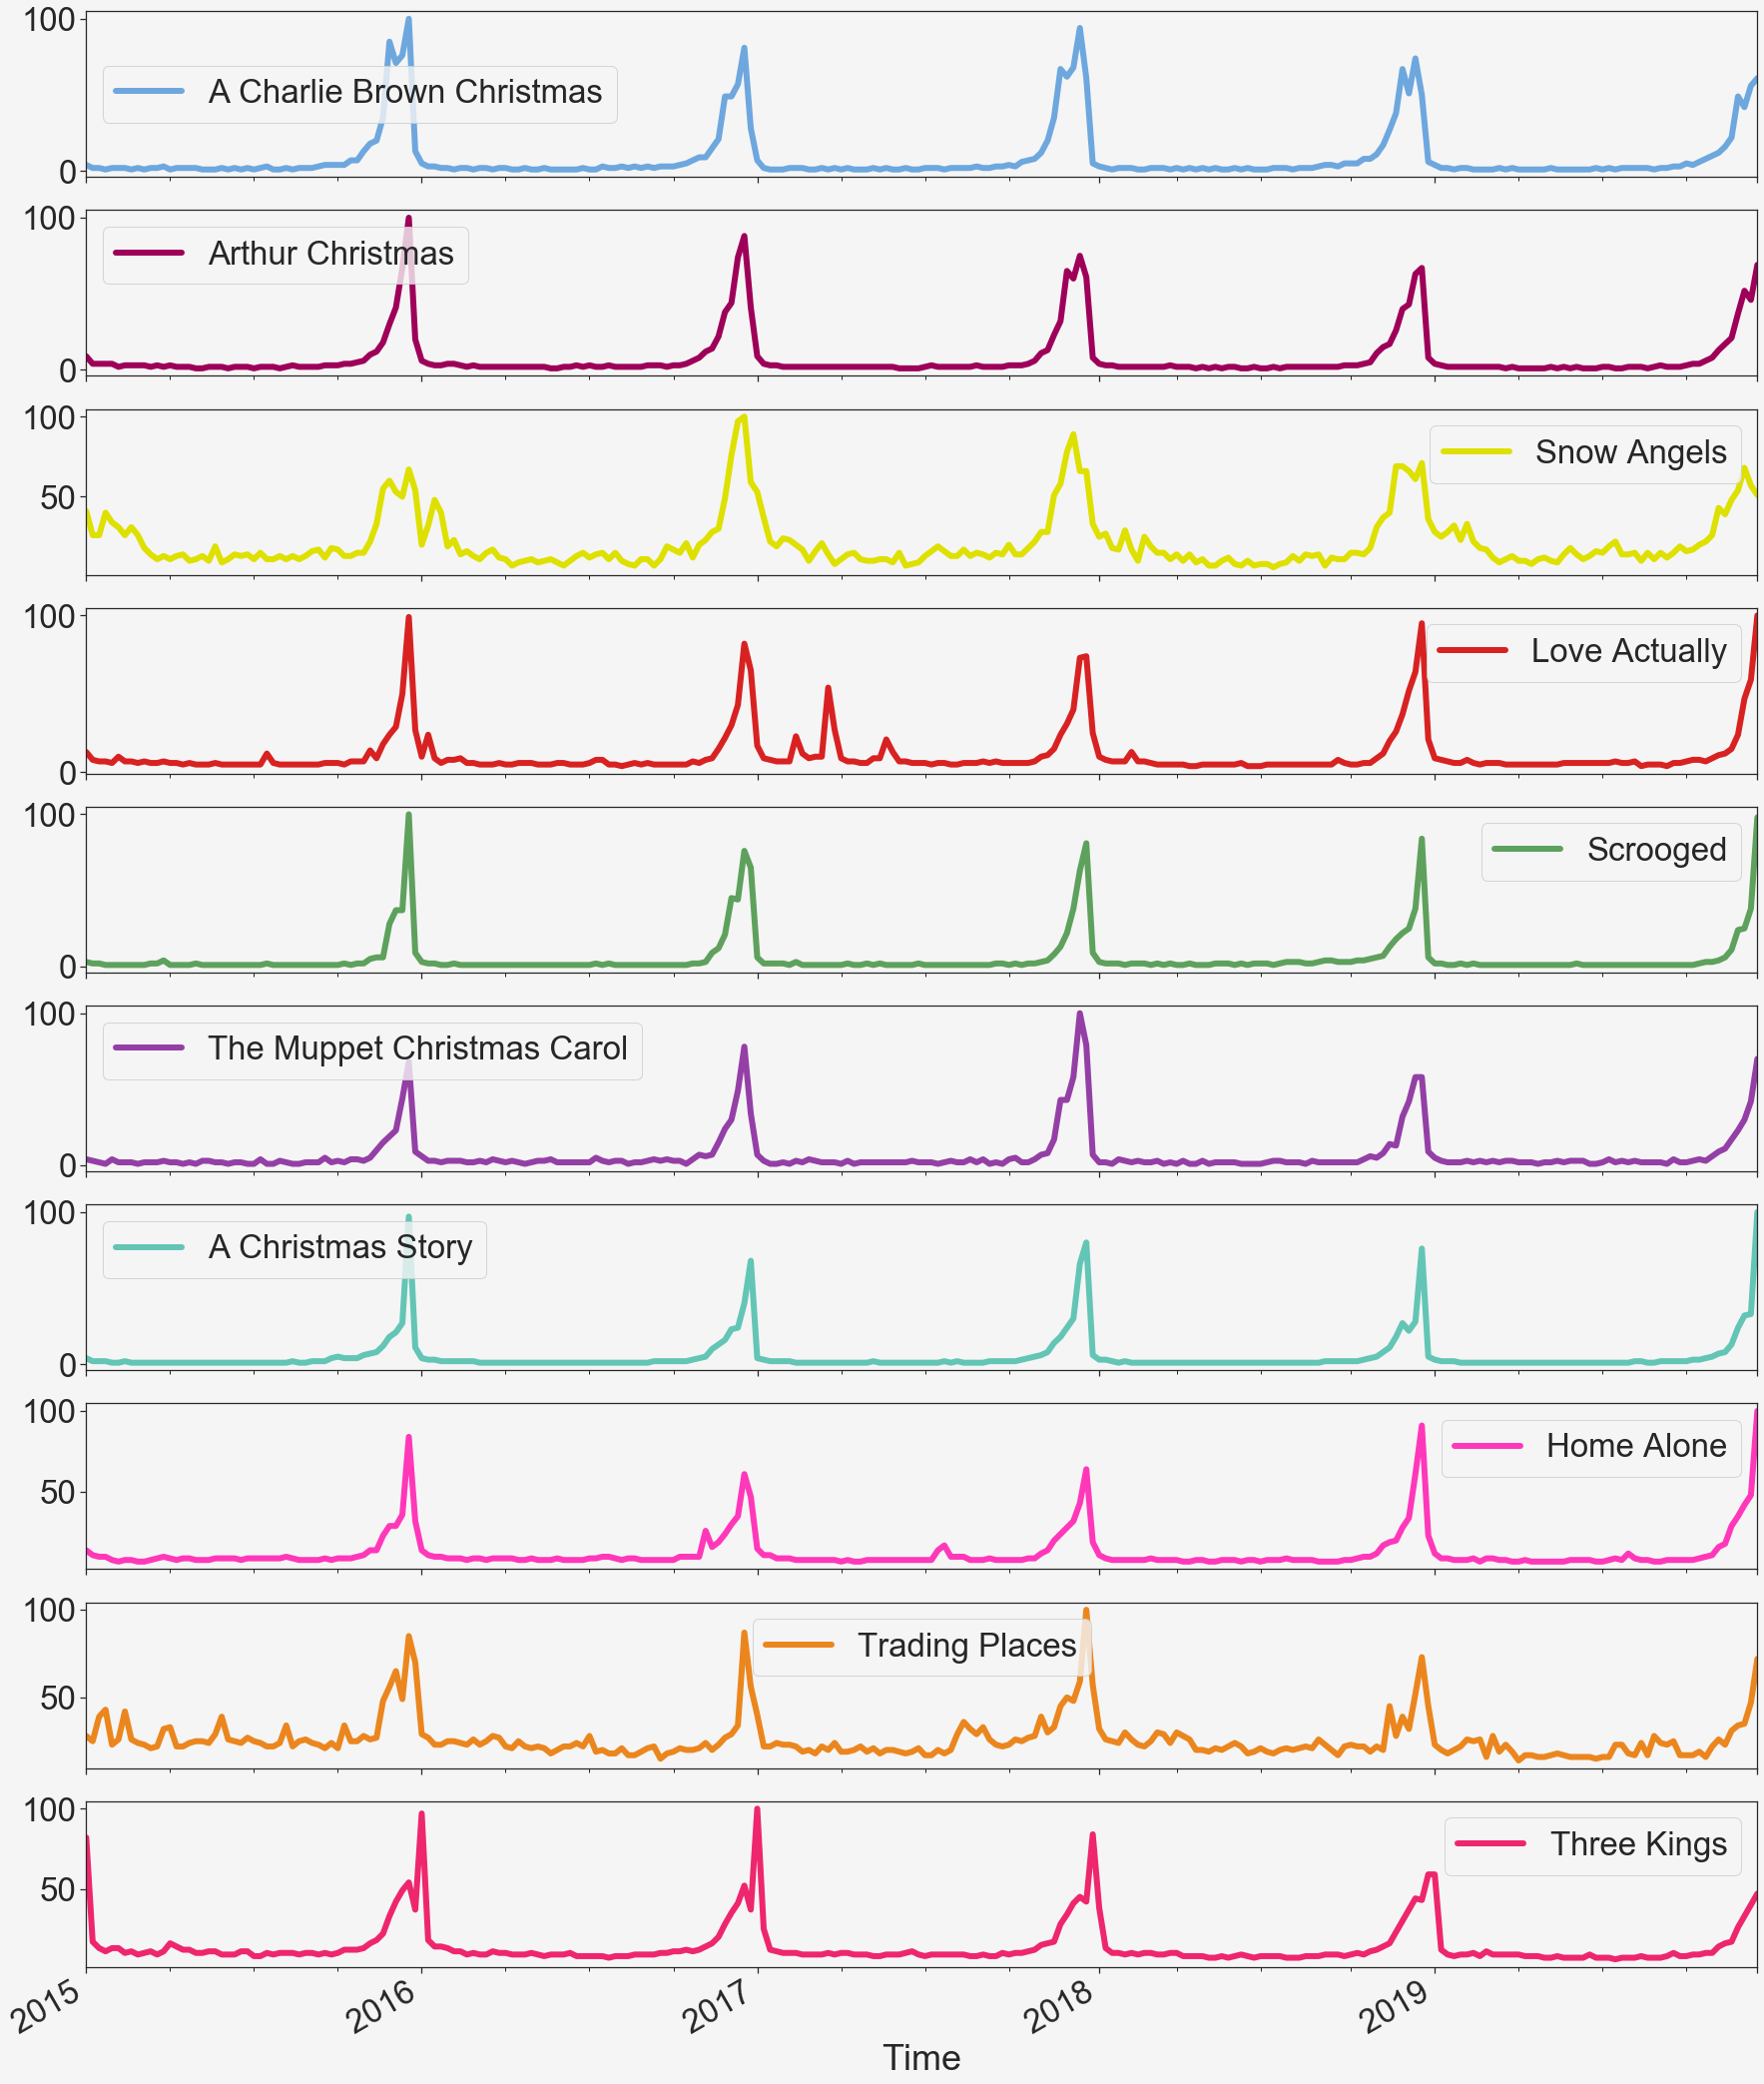

In [67]:
sns.set(rc={'figure.figsize':(30, 40)}, font_scale = 3)
sns.set_context(rc={"lines.linewidth": 6})
sns.set_style("ticks",rc= {'axes.facecolor':'#f5f5f5', 'figure.facecolor':'#f5f5f5'})

colors = ['#6da7de','#9e0059','#dee000','#d82222','#5ea15d','#943fa6','#63c5b5','#ff38ba','#eb861e','#ee266d']
sns.set_palette(colors)
#sns.set(rc= {'axes.facecolor':'#f5f5f5', 'figure.facecolor':'#f5f5f5'})
'IMDB 2000: the 10 most "christmassy" movies acording to GoogleTrends'
axes = top[top.columns[::-1]].plot.line(subplots=True)
#axes.set_title('IMDB 2000: the 20 most "christmassy" movies acording to GoogleTrends (in decending order)')
type(axes)
